In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as sk_lm
import matplotlib.pyplot as plt
import sklearn.neighbors as skl_nb
import sklearn.preprocessing as skl_pre
from sklearn.metrics import accuracy_score, classification_report

In [2]:
training_data = 'training_data_VT2026.csv'
data = pd.read_csv(training_data)
np.random.seed(1)
trainI = np.random.choice(data.shape[0],size =1280, replace=False)
trainIndex = data.index.isin(trainI)
train = data.iloc[trainIndex]
test = data.iloc[~trainIndex]

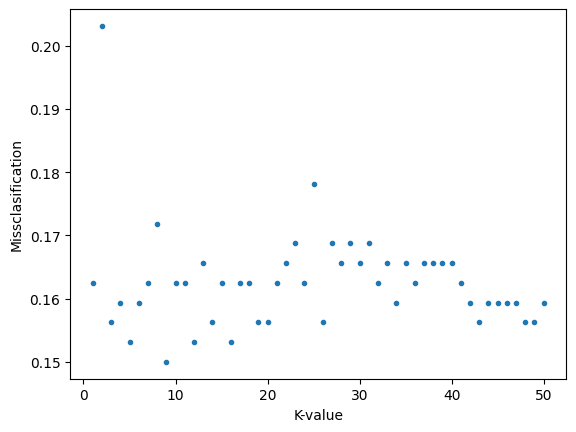

In [5]:
training_var = ['hour_of_day','day_of_week','month','holiday','weekday','summertime','temp','dew','humidity','precip','snow','snowdepth','windspeed','cloudcover','visibility']
x_train = train[training_var]
y_train = train['increase_stock']
x_test = test[training_var]
y_test = test['increase_stock']
scaler = skl_pre.StandardScaler().fit(x_train)
model = skl_nb.KNeighborsClassifier(n_neighbors=11)
missclass = []
for k in range(1,51):

    model = skl_nb.KNeighborsClassifier(n_neighbors=k)

    model.fit(scaler.transform(x_train),y_train)

    prediction = model.predict(scaler.transform(x_test))
    missclass.append(np.mean(prediction != y_test))
K = np.linspace(1,50,50)
plt.ylabel('Missclasification')
plt.xlabel('K-value')
plt.plot(K,missclass,'.')

In [6]:

scaler = skl_pre.StandardScaler().fit(x_train)
model = skl_nb.KNeighborsClassifier(n_neighbors=11)
model.fit(scaler.transform(x_train),y_train)
prediction = model.predict(scaler.transform(x_test))
print("Accuracy:", accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy: 0.8375
                  precision    recall  f1-score   support

high_bike_demand       0.64      0.34      0.45        61
 low_bike_demand       0.86      0.95      0.90       259

        accuracy                           0.84       320
       macro avg       0.75      0.65      0.68       320
    weighted avg       0.82      0.84      0.82       320

